In [1]:
import clustering_functions as cf
import os
import pandas as pd

/home/elchristog/.local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/elchristog/.local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/elchristog/.local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWa

In [2]:
csv_path = "etl_data/entidades_df.csv"
result_df = cf.read_partitioned_csv(csv_path)
print(result_df.shape)
result_df.head()

(1579, 89)


,NIT_ENTIDAD,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
1,899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,40.354839
2,8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,...,1,0,0,1,5,0,NaN,NaN,NaN,NaN
3,830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,...,3,9,0,3,0,0,NaN,NaN,NaN,NaN
4,900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN


In [3]:
result_df = result_df.drop_duplicates(subset='NIT_ENTIDAD')
print(result_df.shape)

(1273, 89)


In [4]:
cleaned_df = cf.replace_nulls(result_df)
cleaned_df.head()

,NIT_ENTIDAD,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
1,899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,4.035484e+01
2,8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
3,830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
4,900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [5]:
cleaned_df.index = cleaned_df['NIT_ENTIDAD']
cleaned_df = cleaned_df.drop(columns=['NIT_ENTIDAD'])
cleaned_df.head()

,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,1,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,4.035484e+01
8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,1,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,1,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,1,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [6]:
cleaned_df_nombre_entidad = cleaned_df[['NOMBRE_ENTIDAD']]
cleaned_df_nombre_entidad.head()

cleaned_df.drop(columns=['NOMBRE_ENTIDAD'], inplace=True)

cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,21,143107415,6.814639e+06,1,2,2,4,1,1,20,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
899999034,143,4797008008,3.354551e+07,1,4,3,3,1,1,19,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,4.035484e+01
8605110716,178,25267081930,1.419499e+08,1,7,6,9,1,1,20,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
830063506,1171,181157002383,1.547028e+08,1,7,7,12,1,1,19,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
900816913,1,223000000,2.230000e+08,1,1,0,1,1,1,19,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [7]:
scaled_df = cf.apply_standard_scaler(cleaned_df)
scaled_df.index = cleaned_df_nombre_entidad.index
scaled_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,-0.333310,-0.143741,-0.088175,-0.028039,-0.687634,-0.398806,-0.066825,-0.03763,-0.03763,-0.055058,...,-0.122141,-0.045119,-0.062151,-0.059072,-0.041945,-0.063598,-0.150195,-0.077207,-0.096782,0.319632
899999034,-0.160116,-0.126345,-0.080606,-0.028039,0.547004,0.097460,-0.418348,-0.03763,-0.03763,-0.669869,...,-0.122141,-0.045119,-0.062151,-0.140898,-0.041945,-0.063598,2.581206,-0.048940,-0.080031,-3.128601
8605110716,-0.110429,-0.049830,-0.049914,-0.028039,2.398960,1.586260,1.690789,-0.03763,-0.03763,-0.055058,...,0.173459,-0.045119,-0.062151,-0.059072,-0.021978,-0.063598,-0.150195,-0.077207,-0.096782,0.319632
830063506,1.299254,0.532866,-0.046303,-0.028039,2.398960,2.082526,2.745357,-0.03763,-0.03763,-0.669869,...,0.764659,34.416739,-0.062151,0.104581,-0.041945,-0.063598,-0.150195,-0.077207,-0.096782,0.319632
900816913,-0.361702,-0.143442,-0.026966,-0.028039,-1.304953,-1.391340,-1.121394,-0.03763,-0.03763,-0.669869,...,-0.122141,-0.045119,-0.062151,-0.140898,-0.037951,-0.063598,-0.150195,-0.077207,-0.096782,0.319632


## Probando reduccion de dimensionalidad

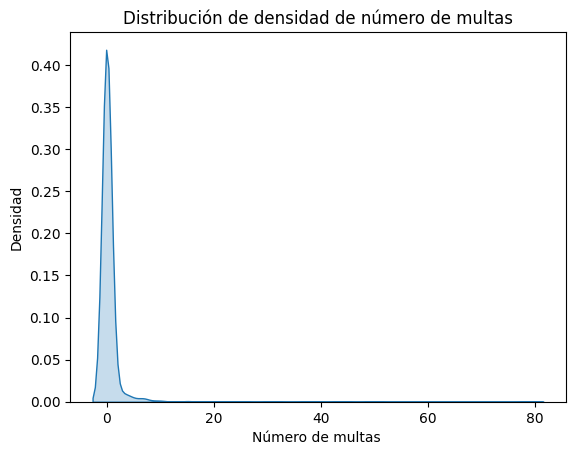

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(cleaned_df['numero_de_multas'], fill=True)

# Etiquetas y título
plt.xlabel('Número de multas ')
plt.ylabel('Densidad')
plt.title('Distribución de densidad de número de multas')

# Muestra la gráfica
plt.show()


In [9]:
num_contratos_labels = pd.cut(cleaned_df['numero_de_multas'], bins=50, labels=False)
print(num_contratos_labels.nunique())
print(num_contratos_labels.value_counts())
print(cleaned_df['numero_de_multas'].max())


17
0     1197
1       29
2       12
3        9
4        8
6        3
5        3
9        2
15       2
10       1
24       1
11       1
31       1
27       1
13       1
19       1
49       1
Name: numero_de_multas, dtype: int64
79.0


https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29#:~:text=UMAP%20outperformed%20t%2DSNE%20and,points%20and%20their%20relative%20proximities.

In [10]:
sampled_df = scaled_df.sample(frac=0.99, random_state=42)

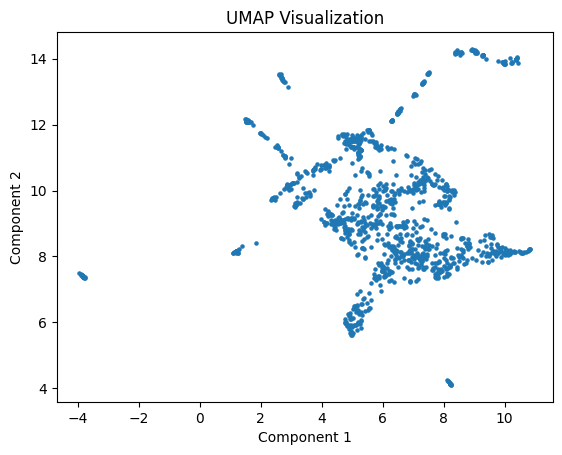

In [11]:
n_components = 3
umap_data, explained_variance_ratio_cumsum = cf.apply_umap(sampled_df, n_components)

cf.plot_3d(umap_data[:, 0],umap_data[:, 1],umap_data[:, 2])

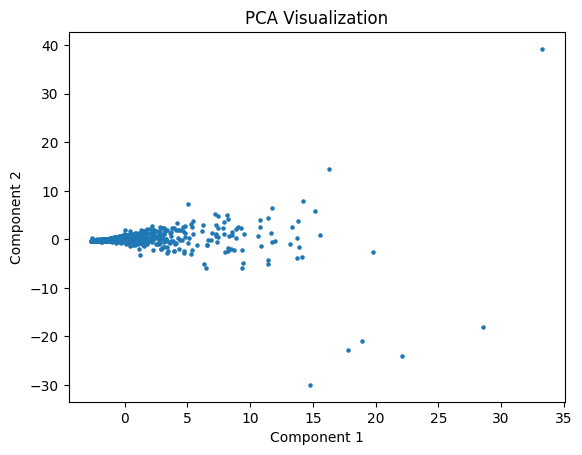

In [12]:
n_components = 3
pca_data, pca_explained_variance_ratio_cumsum = cf.apply_pca(sampled_df, n_components)

cf.plot_3d(pca_data[:, 0],pca_data[:, 1],pca_data[:, 2])


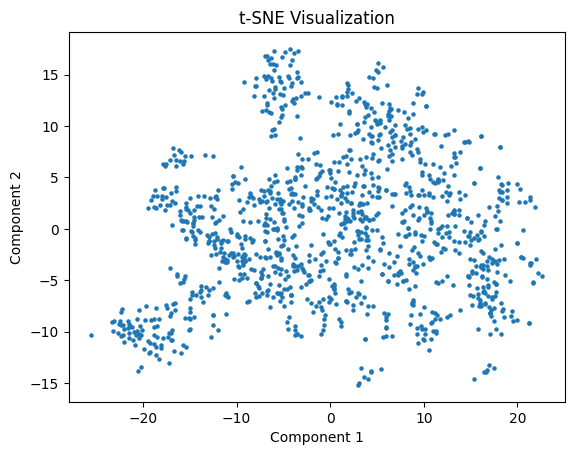

In [13]:
n_components = 3
tsne_data = cf.apply_tsne(sampled_df, n_components)

cf.plot_3d(tsne_data[:, 0],tsne_data[:, 1],tsne_data[:, 2])


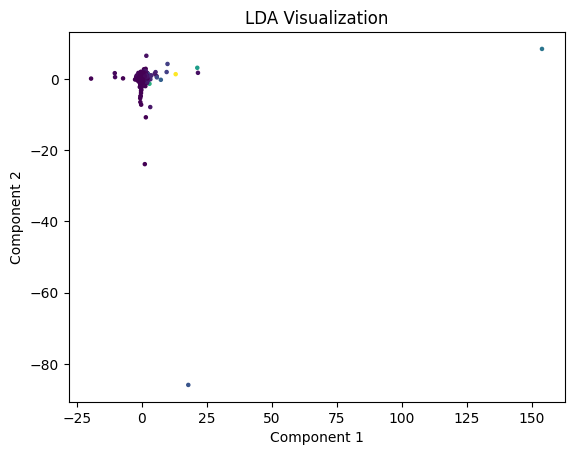

In [14]:
n_components = 5
num_contratos_labels = pd.cut(sampled_df['numero_de_multas'], bins=50, labels=False)
lda_data, lda_explained_variance_ratio_cumsum = cf.apply_lda(sampled_df.drop(columns=['numero_de_multas']), num_contratos_labels , n_components)

cf.plot_3d(lda_data[:, 0],lda_data[:, 1],lda_data[:, 2])


## Aplicando la reducción seleccionada

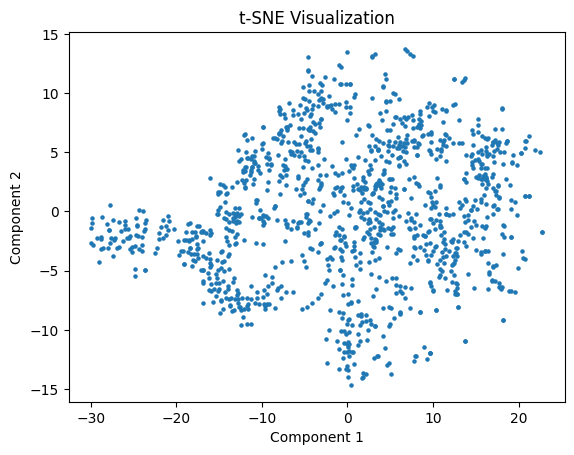

T-SNE components:
 [[ -2.5598228    3.1228328    0.04348891]
 [ 15.733958     2.3337202    8.37726   ]
 [ 10.395346     4.407669    16.539991  ]
 ...
 [ -5.4585166    7.815768   -11.805521  ]
 [  9.203937    -3.6572883   -3.4399555 ]
 [-19.082582    -4.414439    -0.65540445]]


In [15]:
n_components = 3
# umap_data, explained_variance_ratio_cumsum = cf.apply_umap(scaled_df, n_components)
# print("UMAP components:\n", umap_data)
# print("\nCumulative explained variance:\n", explained_variance_ratio_cumsum)

tsne_data = cf.apply_tsne(scaled_df, n_components)
print("T-SNE components:\n", tsne_data)


In [16]:
reduced_df = pd.DataFrame(tsne_data, columns=['C1', 'C2', 'C3'])
reduced_df.to_csv(os.path.join("clustering_data", "reduced_df.csv"), index=False)

In [17]:
reduced_df = pd.read_csv("clustering_data/reduced_df.csv")
reduced_df.head()

,C1,C2,C3
0,-2.559823,3.122833,0.043489
1,15.733958,2.333720,8.377260
2,10.395346,4.407669,16.539991
3,9.334705,-12.445848,-0.545462
4,-16.046225,-1.585079,-4.621987


## Probando metodologías de clustering

### kmeans

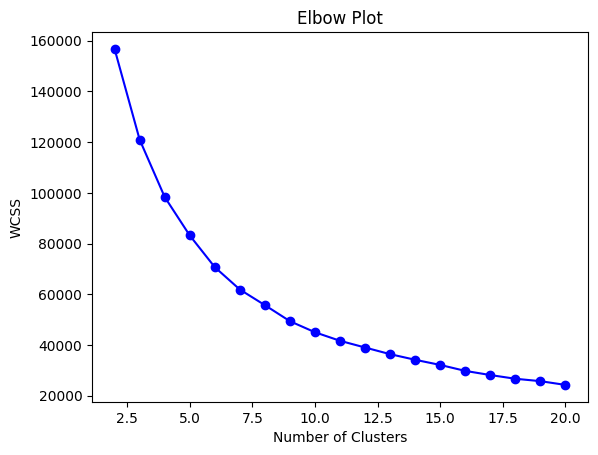

In [18]:
cf.find_optimal_clusters(reduced_df)


In [19]:
labels = cf.perform_kmeans(reduced_df,7)

In [20]:
cf.plot_3d_clusters(tsne_data[:, 0],tsne_data[:, 1],tsne_data[:, 2],labels)

### Aglomerativo

/home/elchristog/.local/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



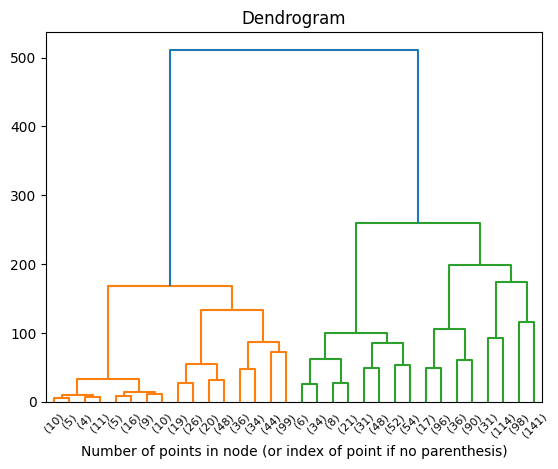

In [21]:
labels_agg = cf.perform_agglomerative_clustering_and_plot_dendrogram(reduced_df,7)

In [22]:
cf.plot_3d_clusters(tsne_data[:, 0],tsne_data[:, 1],tsne_data[:, 2],labels_agg)

## Optics

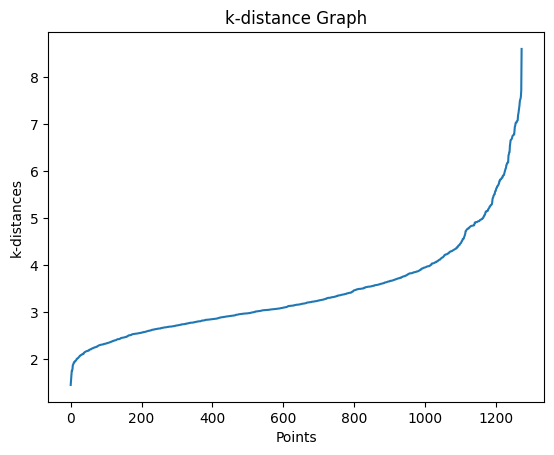

In [32]:
labels_opt = cf.perform_optics_clustering(reduced_df,k_neighbors=15,max_eps=5)

In [33]:
cf.plot_3d_clusters(tsne_data[:, 0],tsne_data[:, 1],tsne_data[:, 2],labels_opt)

# Seleccionando y aplicando

In [34]:
cleaned_df['cluster'] = labels
cleaned_df['NOMBRE_ENTIDAD'] = cleaned_df_nombre_entidad
cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,SANTANDER,VAUPES,NARIÑO,CAQUETA,NO DEFINIDO,CASANARE,META,AMAZONAS,GUAVIARE,CAUCA,VICHADA,ANTIOQUIA,QUINDIO,CHOCO,SAN ANDRES PROVIDENCIA Y SANTA CATALINA,CALDAS,BOYACA,VALLE DEL CAUCA,CUNDINAMARCA,LA GUAJIRA,TOLIMA,ARAUCA,NORTE DE SANTANDER,BOGOTA,HUILA,SUCRE,ATLANTICO,BOLIVAR,RISARALDA,PUTUMAYO,MAGDALENA,GUAINIA,CORDOBA,CESAR,TERMINADO,ACTIVO,BORRADOR,CEDIDO,MODIFICADO,EN EJECUCION,ENVIADO PROVEEDOR,SUSPENDIDO,CERRADO,CONTRATACION DIRECTA,null,CONCURSO DE MERITOS,CONTRATACION MINIMA CUANTIA,LICITACION OBRA PUBLICA,SUBASTA,LICITACION PUBLICA,REGIMEN ESPECIAL,SELECCION ABREVIADA DE MENOR CUANTIA,EMPRESTITO,SEGUROS,CONSULTORIA,PRESTACION DE SERVICIOS,ACUERDO MARCO DE PRECIOS,COMISION,COMPRAVENTA,COMODATO,SUMINISTROS,SERVICIOS FINANCIEROS,NEGOCIO FIDUCIARIO,OTRO,VENTA INMUEBLES,ARRENDAMIENTO DE INMUEBLES,ARRENDAMIENTO DE MUEBLES,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa,cluster,NOMBRE_ENTIDAD,NIT_ENTIDAD
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
805027641,21,143107415,6.814639e+06,1,2,2,4,1,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,0,10,9,0,2,0,0,0,0,0,0,0,0,14,0,0,3,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08,0,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,805027641
899999034,143,4797008008,3.354551e+07,1,4,3,3,1,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,26,110,0,0,0,133,0,0,7,0,3,0,0,0,0,0,0,136,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,10.0,26631119.0,2663111.9,4.035484e+01,2,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION CAFETERA,899999034
8605110716,178,25267081930,1.419499e+08,1,7,6,9,1,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,0,0,0,0,0,0,0,0,0,0,2,1,2,0,10,154,0,1,8,146,3,0,11,1,10,0,5,2,0,0,0,149,0,0,1,2,4,0,0,10,0,5,0,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08,2,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES EXTERIORES,8605110716
830063506,1171,181157002383,1.547028e+08,1,7,7,12,1,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1171,0,0,0,0,0,0,0,0,0,0,5,28,0,63,83,989,0,2,1,1092,9,3,10,17,2,0,21,17,1,2,2,1114,0,0,2,0,1,1,0,32,0,1,0,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08,6,BOGOTA - TRANSMILENIO,830063506
900816913,1,223000000,2.230000e+08,1,1,0,1,1,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08,4,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO DE BUENAVENTURA,900816913


In [35]:
cleaned_df["NIT_ENTIDAD"] = cleaned_df.index
cleaned_df.to_csv(os.path.join("clustering_data", "entidades_clustered_df.csv"), index=False)

In [36]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

cluster_centroids = cf.get_cluster_centroids(cleaned_df)
print(cluster_centroids)

         num_contratos  suma_valor_total_contrato  promedio_valor_total_contrato  num_departamentos  num_estados_proceso  num_clases_proceso  num_tipos_proceso  num_familias  num_clases  meses_desde_ultimo_contrato  SANTANDER  VAUPES     NARIÑO   CAQUETA  NO DEFINIDO   CASANARE       META  AMAZONAS  GUAVIARE      CAUCA   VICHADA  ANTIOQUIA    QUINDIO     CHOCO  SAN ANDRES PROVIDENCIA Y SANTA CATALINA     CALDAS     BOYACA  VALLE DEL CAUCA  CUNDINAMARCA  LA GUAJIRA     TOLIMA    ARAUCA  NORTE DE SANTANDER      BOGOTA      HUILA      SUCRE  ATLANTICO    BOLIVAR  RISARALDA   PUTUMAYO  MAGDALENA   GUAINIA   CORDOBA      CESAR  TERMINADO     ACTIVO  BORRADOR    CEDIDO  MODIFICADO  EN EJECUCION  ENVIADO PROVEEDOR  SUSPENDIDO   CERRADO  CONTRATACION DIRECTA       null  CONCURSO DE MERITOS  CONTRATACION MINIMA CUANTIA  LICITACION OBRA PUBLICA   SUBASTA  LICITACION PUBLICA  REGIMEN ESPECIAL  SELECCION ABREVIADA DE MENOR CUANTIA  EMPRESTITO   SEGUROS  CONSULTORIA  PRESTACION DE SERVICIOS  ACUERD

- Cluster 1 - Pocos Contratos de Monto Alto con Nulas Multas:
Este cluster agrupa a entidades que otorgan en promedio 35 contratos con un valor promedio aproximado de 914 millones de pesos. Han sido multados en promedio 0 veces con un valor promedio de multas de alrededor de 26 mil pesos. El tiempo desde la última multa es muy alto. Operan principalmente en Santander, Cauca y Antioquia.

- Cluster 2 - Contratos Medianos de Moderado Alto con Moderadas Multas:
En este cluster, las entidades otorgan alrededor de 148 contratos con un valor promedio de 193 millones de pesos. Han sido multadas en promedio 0.3 veces con un valor promedio de multas de alrededor de 962 mil pesos. El tiempo desde la última multa es muy alto. Operan principalmente en Antioquia, Bogotá y Valle del Cauca.

- Cluster 3 - Muchos Contratos de Monto Moderado con Altas Multas:
Este cluster incluye entidades que otorgan en promedio 458 contratos con un valor promedio de 157 millones de pesos. Han sido multadas en promedio 3.3 veces (El más alto) con un valor promedio de multas de alrededor de 105 millones de pesos. El tiempo desde la última multa es de aproximadamente 44 meses. Operan principalmente en Bogotá, Antioquia y Valle del Cauca.

- Cluster 4 - Pocos Contratos de Monto Medio Alto Mínimos con Mínimas Multas:
Las entidades en este cluster otorgan en promedio 4 contratos con un valor promedio de aproximadamente 360 millones de pesos. Han sido multadas en promedio 0 veces con un valor promedio de multas de alrededor de 116 mil pesos. El tiempo desde la última multa es de aproximadamente muy alto. Operan principalmente en Santander y Nariño.

- Cluster 5 - Contratos Bajos de Monto Medio con Multas Nulas:
Este cluster agrupa a entidades que otorgan en promedio 9 contratos con un valor promedio de aproximadamente 127 millones de pesos. Han sido multadas en promedio 0 veces con un valor promedio de multas de 0 millones de pesos. Operan principalmente en Bogotá, Antioquia y Tolima.

- Cluster 6 - Contratos Múltiples de Monto Medio con Multas Moderado-Alto:
Las entidades en este cluster otorgan en promedio 980 contratos con un valor promedio de aproximadamente 176 millones de pesos. Han sido multadas en promedio 0.4 veces con un valor promedio de multas de alrededor de 12 millones de pesos. El tiempo desde la última multa es muy alto. Operan principalmente en Bogotá, Antioquia y Valle del Cauca.

- Cluster 7 - Contratos Moderados de Monto Muy bajo con Multas Significativas:
En este cluster, las entidades otorgan alrededor de 143 contratos con un valor promedio de 71 millones de pesos. Han sido multadas en promedio 0 veces con un valor promedio de multas de alrededor de 170 mile pesos. El tiempo desde la última multa es alto. Operan principalmente en Antioquia, Bogotá y Atlántico.

In [28]:
total_num_contratos = cluster_centroids['num_contratos'].sum()
total_promedio_valor_total_contrato = cluster_centroids['promedio_valor_total_contrato'].sum()
total_numero_de_multas = cluster_centroids['numero_de_multas'].sum()
total_promedio_valor_sancion = cluster_centroids['promedio_valor_sancion'].sum()

cluster_centroids['participacion_num_contratos'] = (cluster_centroids['num_contratos'] / total_num_contratos)
cluster_centroids['participacion_promedio_valor_total_contrato'] = (cluster_centroids['promedio_valor_total_contrato'] / total_promedio_valor_total_contrato)
cluster_centroids['participacion_numero_de_multas'] = (cluster_centroids['numero_de_multas'] / total_numero_de_multas)
cluster_centroids['participacion_promedio_valor_sancion'] = (cluster_centroids['promedio_valor_sancion'] / total_promedio_valor_sancion)
cluster_centroids['indice_de_transparencia'] = cluster_centroids['participacion_num_contratos'] * (1-cluster_centroids['participacion_numero_de_multas'])

print(cluster_centroids[['participacion_num_contratos', 'participacion_promedio_valor_total_contrato', 'participacion_numero_de_multas', 'participacion_promedio_valor_sancion', 'indice_de_transparencia']])


         participacion_num_contratos  participacion_promedio_valor_total_contrato  participacion_numero_de_multas  participacion_promedio_valor_sancion  indice_de_transparencia
cluster                                                                                                                                                                         
0                           0.019887                                     0.469473                        0.010371                              0.000217                 0.019681
1                           0.083018                                     0.099466                        0.079052                              0.008018                 0.076455
2                           0.257032                                     0.080858                        0.796524                              0.878455                 0.052300
3                           0.002328                                     0.157253                        0.002046  

In [29]:
cluster_centroids["cluster"] = cluster_centroids.index
cluster_centroids.to_csv("clustering_data/indice_transparencia.csv")

In [30]:
# sigue indice de transparencia del cluster, segun rfm contratos y multas, castiga por estar en el cluster
# sigue a nivel contrato, si el contrato es anomalo dentro del cluster mas puntos de castigo
# y herfindal hisrshman, asi cluster ideal es el que reparte equitativo, no hay multas y se asigna mucho contrato -- pesimo cluster aquel en el que se asigna mucho y hay mucha multa y se es inequitativo
# final indice de transparencia y dashboard (no se si hacer modelo predictivo para palancas, creo que no)